# 📦 Food Delivery Time Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import joblib

In [2]:
# Load and preview data
df = pd.read_csv("Food_Delivery_Times.csv")
df = df.dropna()
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
# Features and target
X = df.drop(columns=["Order_ID", "Delivery_Time_min"])
y = df["Delivery_Time_min"]

cat_features = ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"]
num_features = ["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs"]

In [4]:
# Preprocessing
from sklearn.pipeline import Pipeline

cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])

preprocessor = ColumnTransformer([
    ("cat", cat_transformer, cat_features),
    ("num", num_transformer, num_features)
])

In [5]:
# Model training
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} minutes")

Mean Absolute Error: 6.78 minutes


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)P
print(f"R-squared Score: {r2:.2f}")

R-squared Score: 0.77


In [6]:
joblib.dump(model, "delivery_time_model.pkl")

['delivery_time_model.pkl']

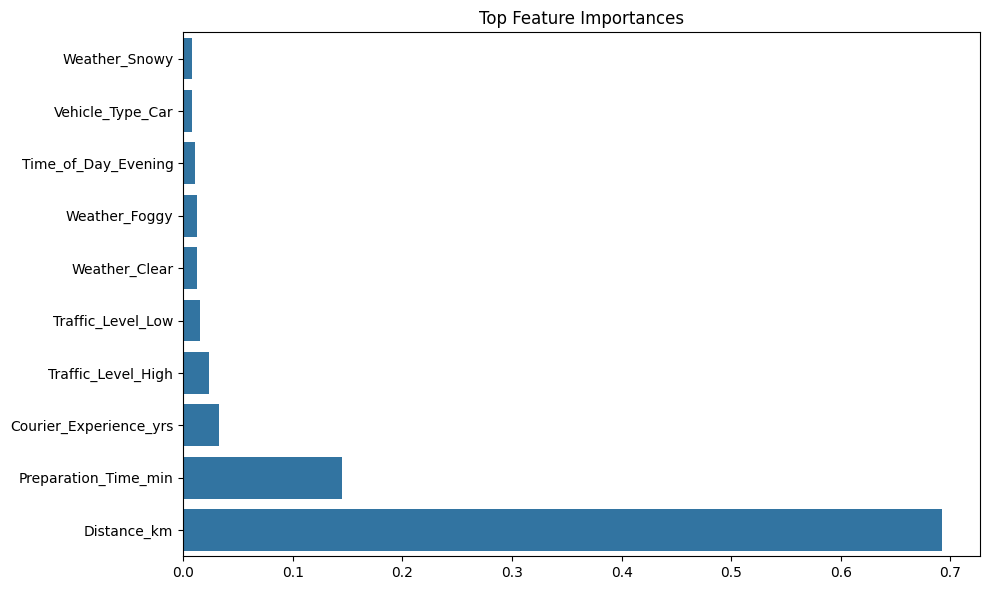

In [ ]:
# Feature importance
model_rf = model.named_steps["regressor"]
encoded_features = model.named_steps["preprocessor"].transformers_[0][1].named_steps["encoder"].get_feature_names_out(cat_features)
all_features = np.concatenate([encoded_features, num_features])

importances = model_rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=all_features[indices])
plt.title("Top Feature Importances")
plt.tight_layout()
plt.show()


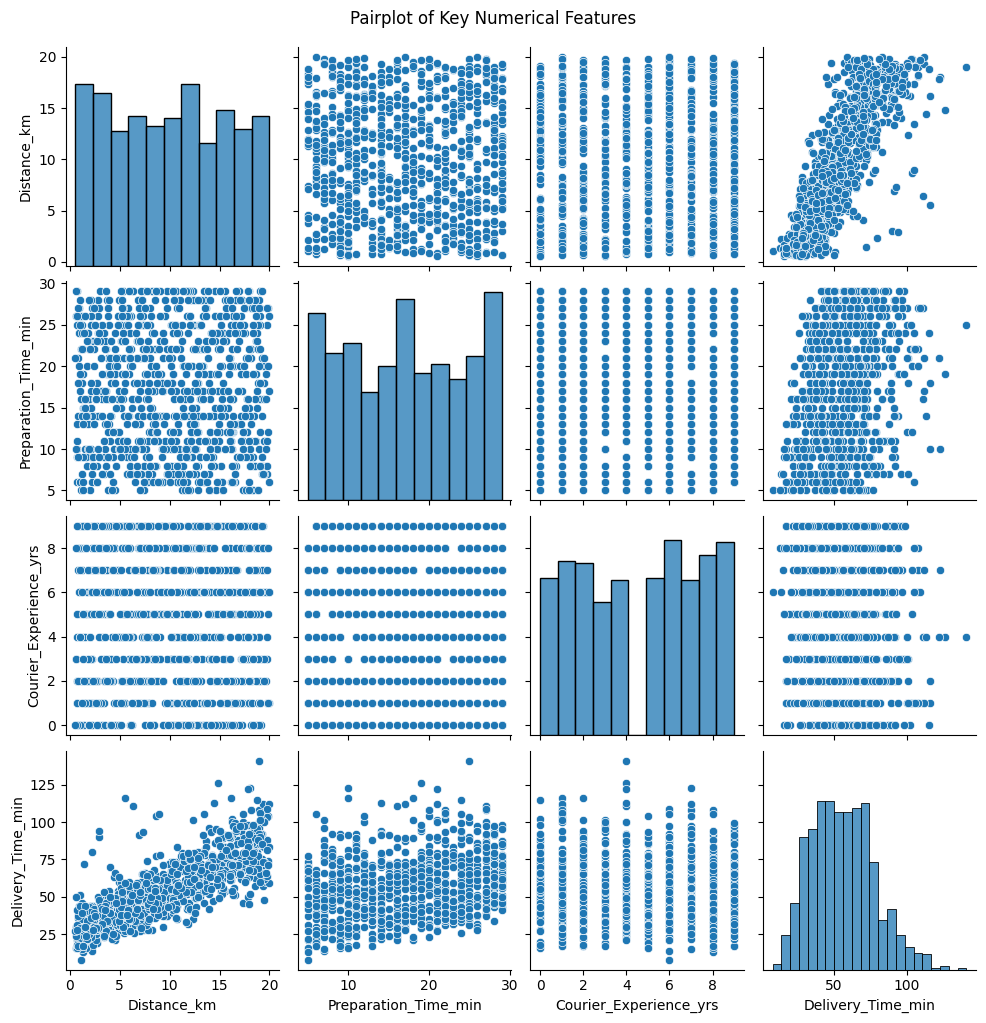

In [8]:
import seaborn as sns
sns.pairplot(df[["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs", "Delivery_Time_min"]])
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()


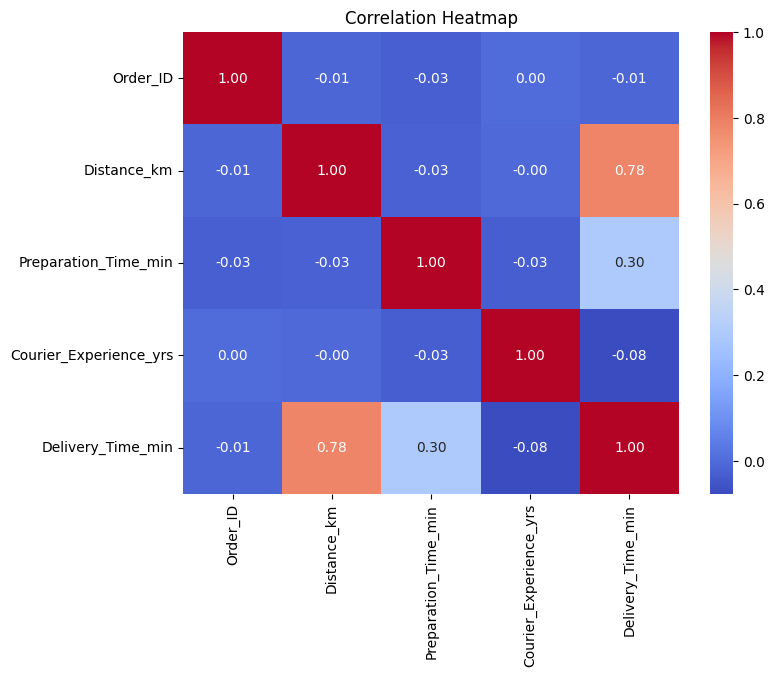

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
# Example input dictionary
sample_input = {
    "Distance_km": 16.42,
    "Weather": "Clear",
    "Traffic_Level": "Medium",
    "Time_of_Day": "Evening",
    "Vehicle_Type": "Bike",
    "Preparation_Time_min": 20,
    "Courier_Experience_yrs": 3
}

input_df = pd.DataFrame([sample_input])
predicted_time = model.predict(input_df)[0]
print(f"Predicted Delivery Time: {predicted_time:.2f} minutes")

Predicted Delivery Time: 79.00 minutes
